In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../bank.csv")

# Exploración de Datos (EDA)

In [2]:
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
columnas_a_usar= ["age", "balance", "day", "duration",  #numericas
                  "job", "marital", "education", "contact", #categoricas
                  "deposit"] #variable a predecir

data_actualizado = data[columnas_a_usar]

#convertir la columna a predecir en binaria (numerica) 
data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

data[columnas_a_usar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   balance    11162 non-null  int64 
 2   day        11162 non-null  int64 
 3   duration   11162 non-null  int64 
 4   job        11162 non-null  object
 5   marital    11162 non-null  object
 6   education  11162 non-null  object
 7   contact    11162 non-null  object
 8   deposit    11162 non-null  object
dtypes: int64(4), object(5)
memory usage: 785.0+ KB


/var/folders/h1/j3hlf_9d2wv_fdvmlsz9t0_m0000gn/T/ipykernel_36322/878265848.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [5]:
data_actualizado

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,1
1,56,45,5,1467,admin.,married,secondary,unknown,1
2,41,1270,5,1389,technician,married,secondary,unknown,1
3,55,2476,5,579,services,married,secondary,unknown,1
4,54,184,5,673,admin.,married,tertiary,unknown,1
...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,blue-collar,single,primary,cellular,0
11158,39,733,16,83,services,married,secondary,unknown,0
11159,32,29,19,156,technician,single,secondary,cellular,0
11160,43,0,8,9,technician,married,secondary,cellular,0


In [6]:
# Distribución de las variables numéricas
data_actualizado[["age", "balance", "day", "duration"]].describe()

,age,balance,day,duration
count,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818
std,11.913369,3225.413326,8.420740,347.128386
min,18.000000,-6847.000000,1.000000,2.000000
25%,32.000000,122.000000,8.000000,138.000000
50%,39.000000,550.000000,15.000000,255.000000
75%,49.000000,1708.000000,22.000000,496.000000
max,95.000000,81204.000000,31.000000,3881.000000


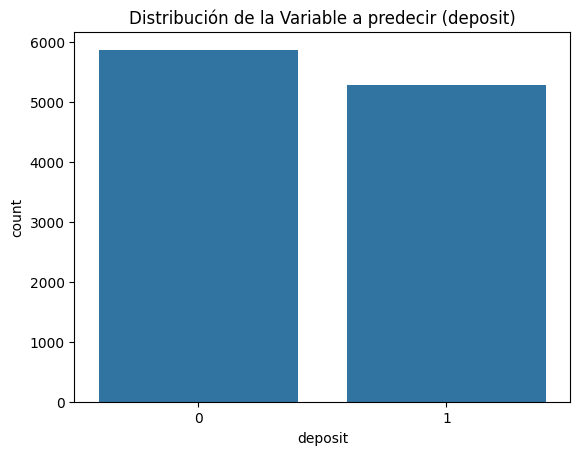

In [7]:
# Distribución de la variable deposit
sns.countplot(x='deposit', data=data_actualizado)
plt.title("Distribución de la Variable a predecir (deposit)")
plt.show()

In [8]:
data_actualizado['deposit'].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

(esta pareja la distribucion de datos en deposit)

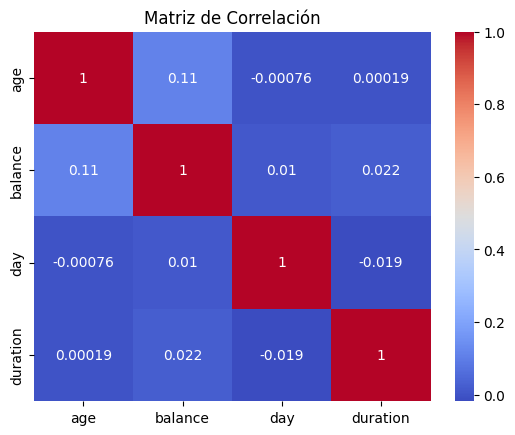

In [9]:
# Matriz de correlación de las variables numéricas con sns (heat map)
matriz_de_correlacion = data_actualizado[["age", "balance", "day", "duration"]].corr() 
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm') 
plt.title("Matriz de Correlación") 
plt.show()

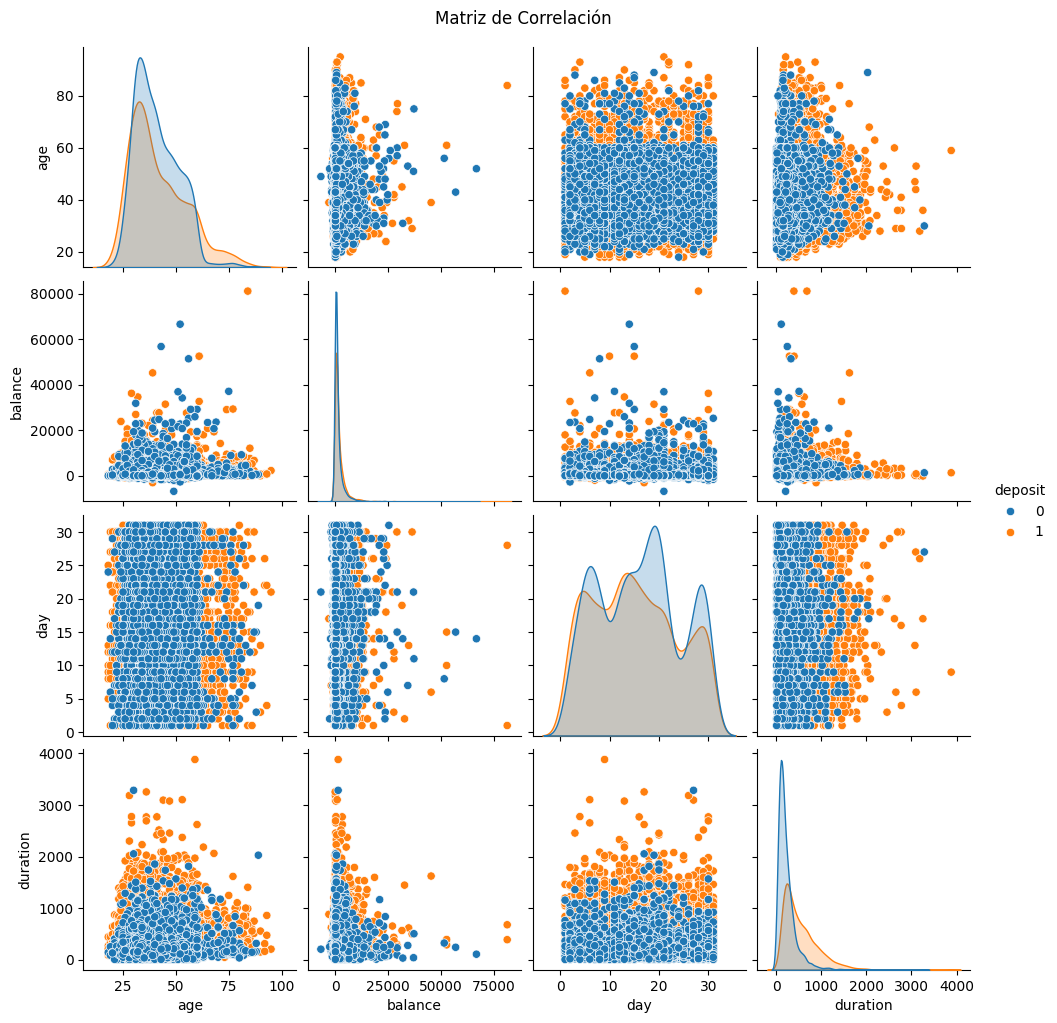

In [10]:
# Matriz de correlación (con seaborn) de las variables numéricas con la variable a predecir (deposit) 

sns.pairplot(data_actualizado[["age", "balance", "day", "duration", "deposit"]], hue='deposit', diag_kind='kde')
plt.suptitle("Matriz de Correlación", y=1.02)
plt.show()

In [11]:
data_actualizado["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

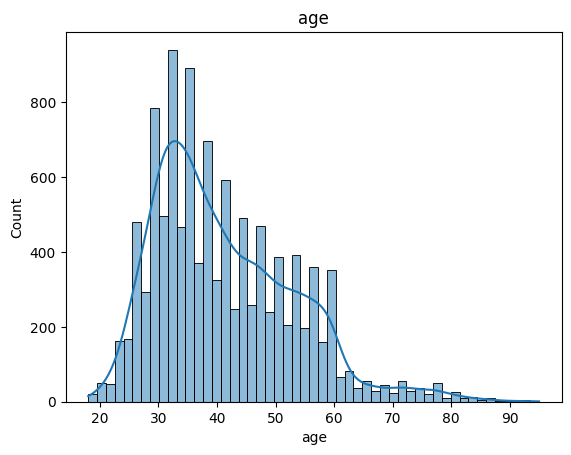

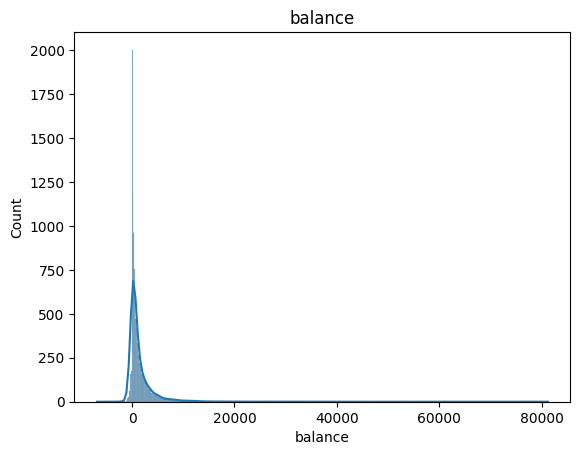

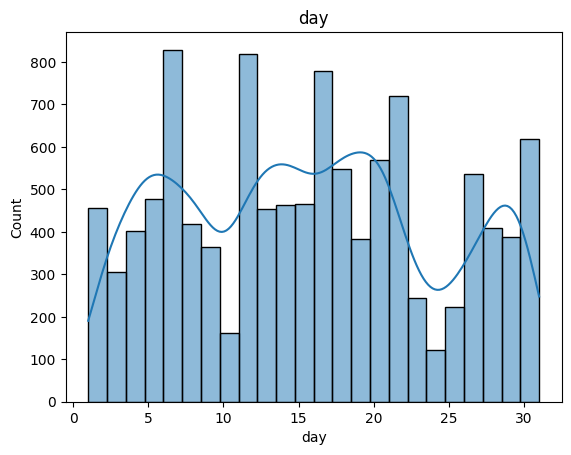

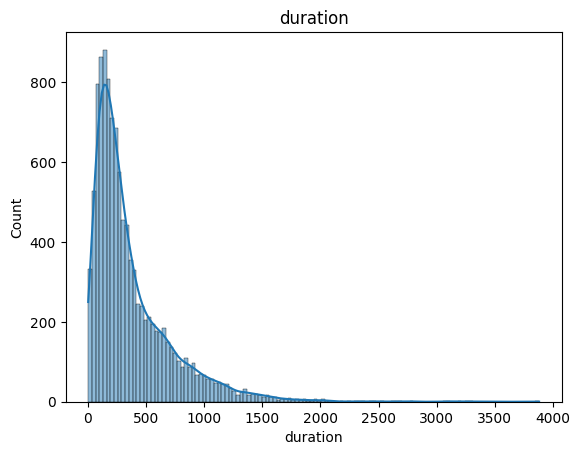

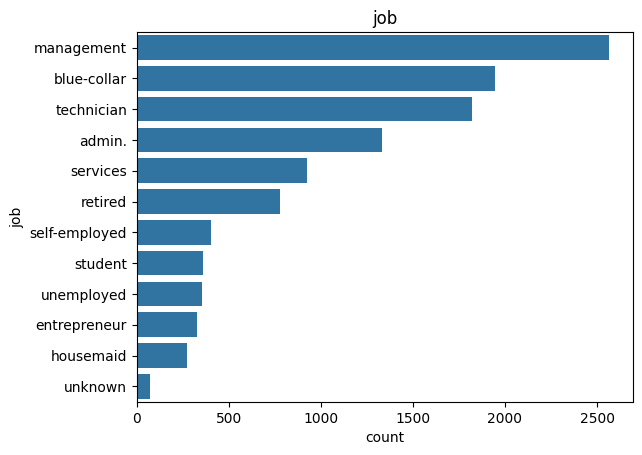

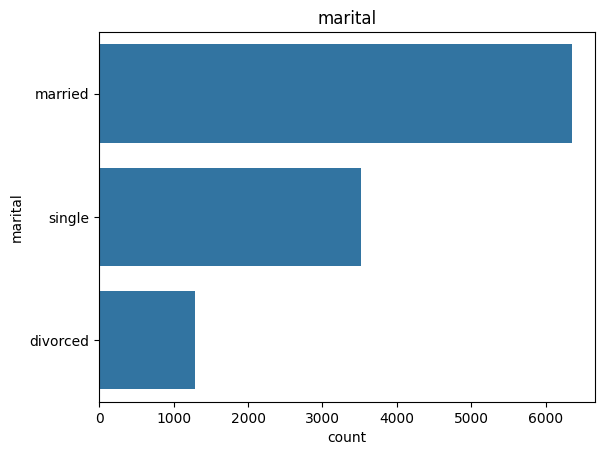

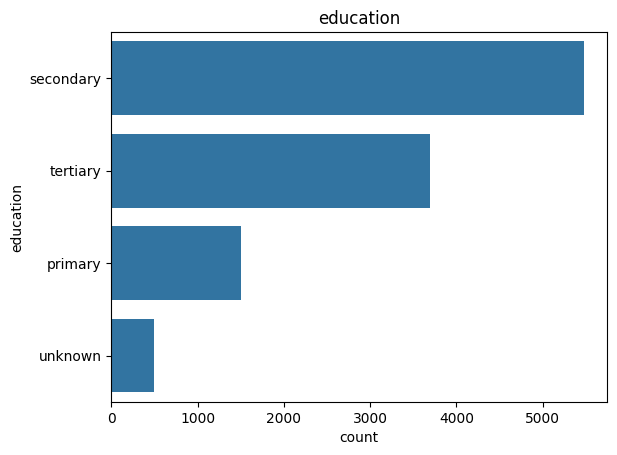

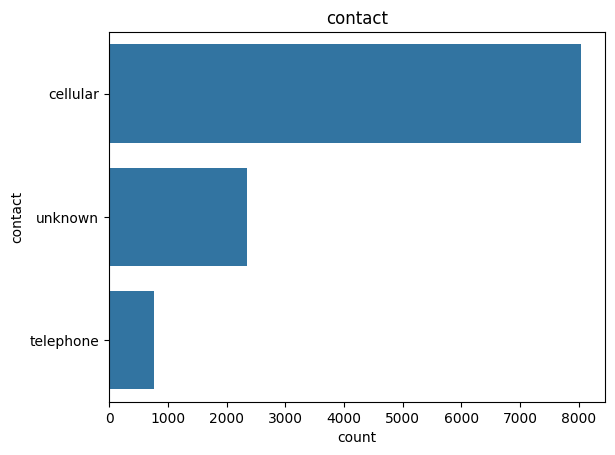

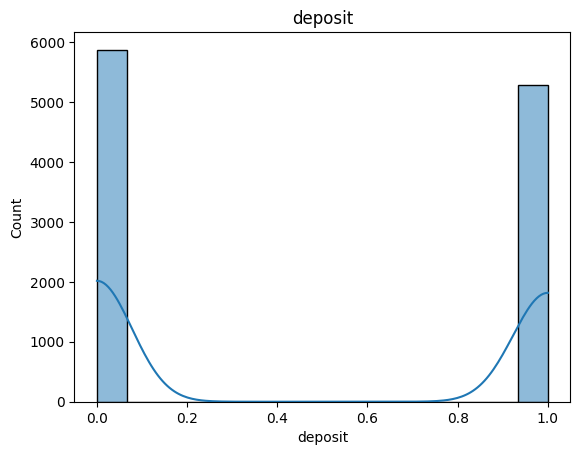

In [12]:
#por cada columna del data set de data_actualizado, chequeamos la distribucion de datos y lo ploteamos 
for col in data_actualizado.columns:
    if data_actualizado[col].dtype == 'object':
        sns.countplot(y=col, data=data_actualizado, order = data_actualizado[col].value_counts().index)
        plt.title(col)
        plt.show()
    else:
        sns.histplot(data_actualizado[col], kde=True)
        plt.title(col)
        plt.show()


# ONE HOT ENCODING (al final no lo utilizamos)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# # Convertir variables categóricas a columnas  
# data_dummies = pd.get_dummies(data_actualizado, drop_first=True)

In [14]:
data_actualizado.head(2)

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,1
1,56,45,5,1467,admin.,married,secondary,unknown,1


# Dividir el dataset y Train Test Split

In [15]:
#dropear todas las columasn categoricas para solo dejar las numericas continuas
X = data_actualizado.drop(columns=["job", "marital", "education", "contact", "deposit"])
y = data_actualizado["deposit"]

In [16]:
#dividir el dataset en train, val y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [17]:
# Identificar columnas no numéricas para asegurarnos de que no haya ninguna
import numpy as np
#en X_train 
non_numeric_columns_train = X_train.select_dtypes(exclude=[np.number]).columns
print("Columnas no numéricas en X_train:", non_numeric_columns_train)

#en X_val 
non_numeric_columns_val = X_val.select_dtypes(exclude=[np.number]).columns
print("Columnas no numéricas en X_val:", non_numeric_columns_val)

Columnas no numéricas en X_train: Index([], dtype='object')
Columnas no numéricas en X_val: Index([], dtype='object')


In [18]:
#verificar si hay nan en las columans numericas
X_train.isnull().sum()


age         0
balance     0
day         0
duration    0
dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
# creacion y entrenamiento del modelo
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

#predecir en val
y_pred = log_model.predict(X_val)
y_pred = log_model.predict(X_val)

Accuracy del modelo: 0.7321988356471115


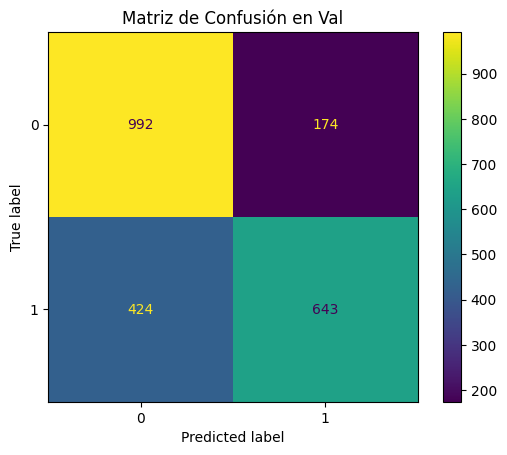

In [20]:
#acurracy en val
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy del modelo:", accuracy)

#matriz de confusion en val 
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión en Val")
plt.show()



992 verdaderos negativos    -----------------            174 falsos negativos

424 falsos positivos        -------------------------             643 verdaderos positivos

Accuracy del modelo en train: 0.7210274790919953


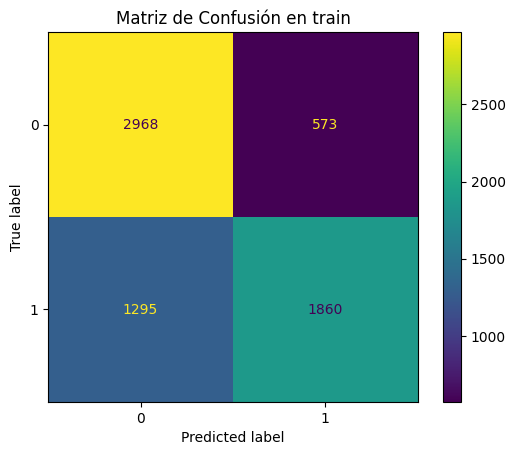

In [21]:
#accuracy en train
y_pred_train = log_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy del modelo en train:", accuracy)

# Matriz de Confusión sobre los datos de Train
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Matriz de Confusión en train')
plt.show()

Accuracy del modelo en test: 0.5172413793103449


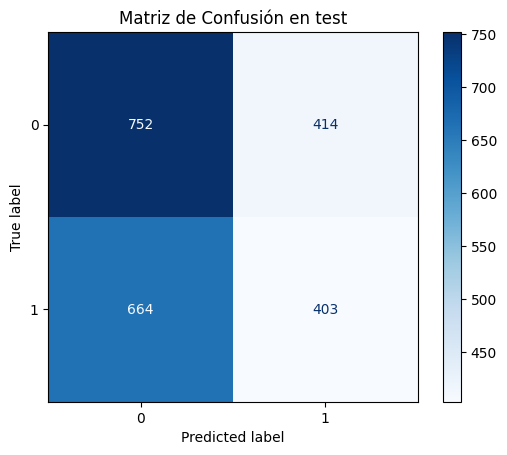

In [22]:
# accuracy en test
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy del modelo en test:", accuracy)

# Matriz de Confusión sobre los datos de Test
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Matriz de Confusión en test')
plt.show()


752 verdaderos negativos    -----------------            414 falsos negativos

664 falsos positivos        -------------------------             403 verdaderos positivos

## Performance del modelo

ROC AUC: 0.5113172180863291


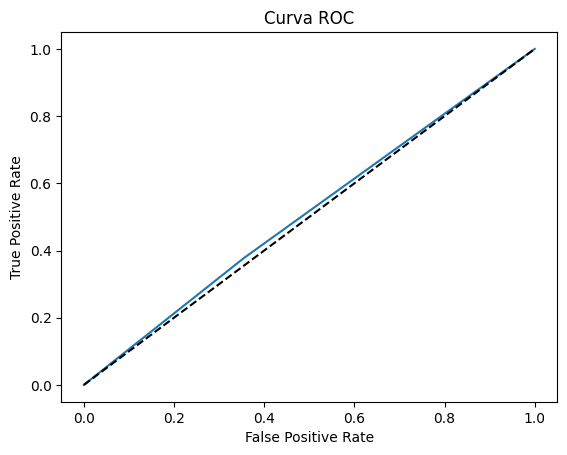

In [23]:
#roc auc 
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

#grafico 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


### muy mala la de arriba

### precision, recall, f1-score y support

              precision    recall  f1-score   support

           0       0.53      0.64      0.58      1166
           1       0.49      0.38      0.43      1067

    accuracy                           0.52      2233
   macro avg       0.51      0.51      0.51      2233
weighted avg       0.51      0.52      0.51      2233



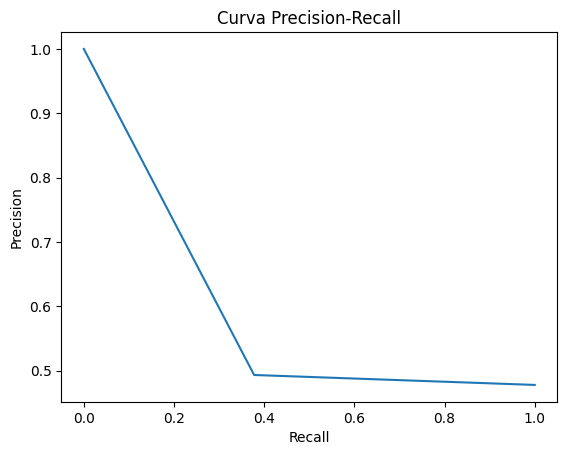

In [24]:
# test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#grafico
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1166
           1       0.79      0.60      0.68      1067

    accuracy                           0.73      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.73      0.73      2233



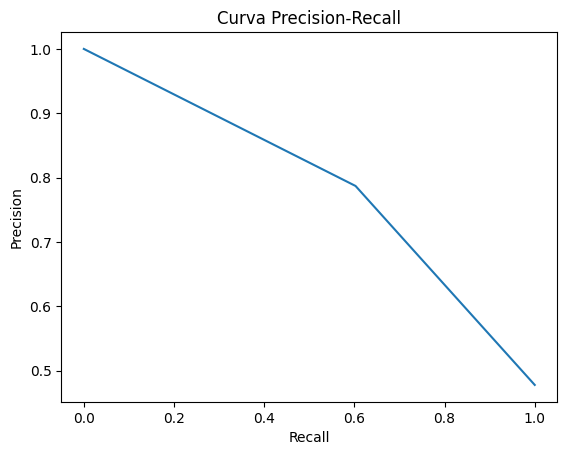

In [25]:
# val
print(classification_report(y_val, y_pred))

#grafico
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()

claramente le fue mucho mejor en validacion

# comparacion de coeficientes

In [26]:
print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)

Coefficients: [[ 6.68872963e-03  4.82282011e-05 -1.65104999e-02  4.41164464e-03]]
Intercept: [-1.67745759]


In [27]:
print(len(X.columns))  # Número de columnas en X
print(log_model.coef_.shape)  # Forma de los coeficientes del modelo

4
(1, 4)


Número de columnas en X: 4
Forma de los coeficientes del modelo: (1, 4)


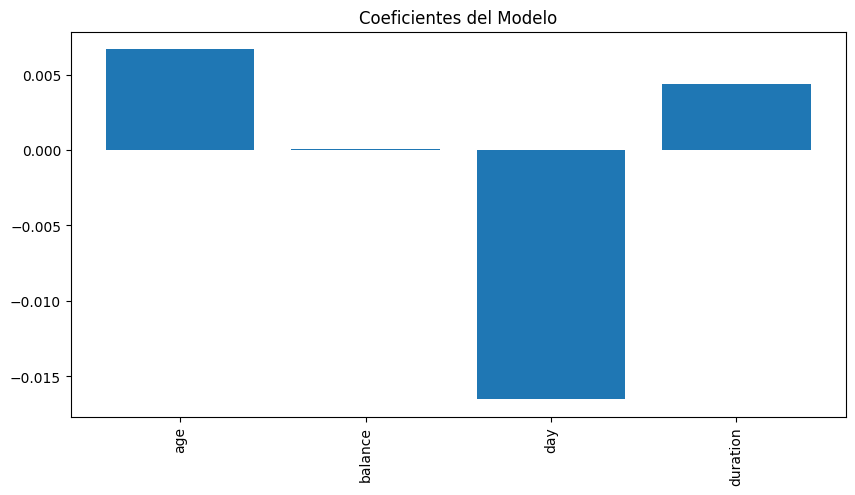

In [28]:
#todo esto de aca abajo lo hciismos con copilot porque nos tiraba un error en cuanto al shape de los coeficientes y no lo entendiamos
# Verificar las dimensiones
print("Número de columnas en X:", len(X.columns))
print("Forma de los coeficientes del modelo:", log_model.coef_.shape)

# Asegurarse de que el modelo está entrenado
if log_model.coef_.shape[1] == len(X.columns):
    # Plotear los coeficientes sin escalar
    plt.figure(figsize=(10, 5))
    plt.bar(X.columns, log_model.coef_[0])
    plt.title("Coeficientes del Modelo")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Las dimensiones no coinciden. Verifica el entrenamiento del modelo y las columnas de X.")

Número de columnas en X_train: 4
El conjunto de datos de entrenamiento no tiene 8 columnas. Verifica el preprocesamiento de los datos.
Forma de los coeficientes del modelo después de reentrenar: (1, 4)


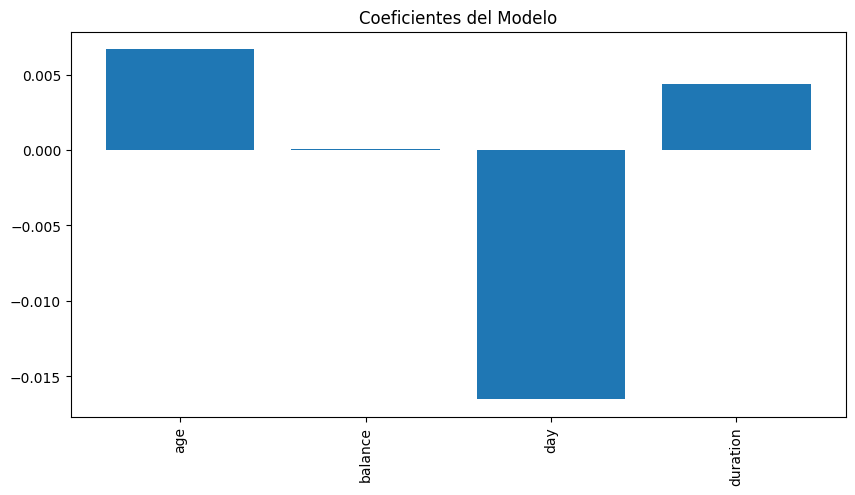

In [29]:
# Verificar las dimensiones de X_train
print("Número de columnas en X_train:", X_train.shape[1])

# Reentrenar el modelo si es necesario
if X_train.shape[1] == 8:
    log_model.fit(X_train_imputed, y_train)
    print("Modelo reentrenado.")
else:
    print("El conjunto de datos de entrenamiento no tiene 8 columnas. Verifica el preprocesamiento de los datos.")

# Verificar nuevamente las dimensiones después de reentrenar
print("Forma de los coeficientes del modelo después de reentrenar:", log_model.coef_.shape)

# Plotear los coeficientes si las dimensiones coinciden
if log_model.coef_.shape[1] == len(X.columns):
    plt.figure(figsize=(10, 5))
    plt.bar(X.columns, log_model.coef_[0])
    plt.title("Coeficientes del Modelo")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Las dimensiones no coinciden después de reentrenar. Verifica el entrenamiento del modelo y las columnas de X.")

In [30]:
# Verificar las columnas de X_train y X
print("Columnas de X_train:", X_train.columns)
print("Columnas de X:", X.columns)

# Verificar si las columnas coinciden
if list(X_train.columns) == list(X.columns):
    print("Las columnas de X_train y X coinciden.")
else:
    print("Las columnas de X_train y X no coinciden. Verifica el preprocesamiento de los datos.")

Columnas de X_train: Index(['age', 'balance', 'day', 'duration'], dtype='object')
Columnas de X: Index(['age', 'balance', 'day', 'duration'], dtype='object')
Las columnas de X_train y X coinciden.


Dimensiones de X.columns: 4
Dimensiones de log_model.coef_[0]: 4


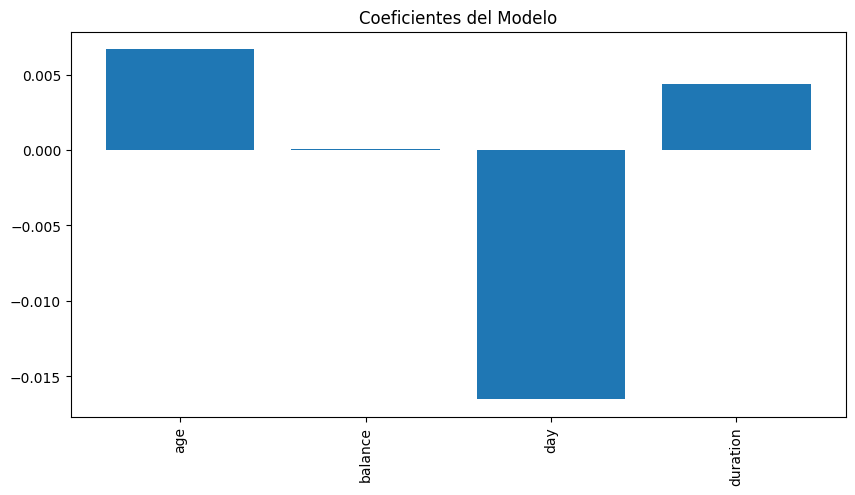

In [31]:
import matplotlib.pyplot as plt

# Verificar las dimensiones
print(f"Dimensiones de X.columns: {len(X.columns)}")
print(f"Dimensiones de log_model.coef_[0]: {len(log_model.coef_[0])}")

# Asegurarse de que las dimensiones coincidan
if len(X.columns) == len(log_model.coef_[0]):
    # Plotear los coeficientes sin escalar
    plt.figure(figsize=(10, 5))
    plt.bar(X.columns, log_model.coef_[0])
    plt.title("Coeficientes del Modelo")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Error: Las dimensiones de X.columns y log_model.coef_[0] no coinciden.")

todo lo que hicimos arriba fue porque no podiamos solucionar el error. Acudimos a copilot

## sin escalado

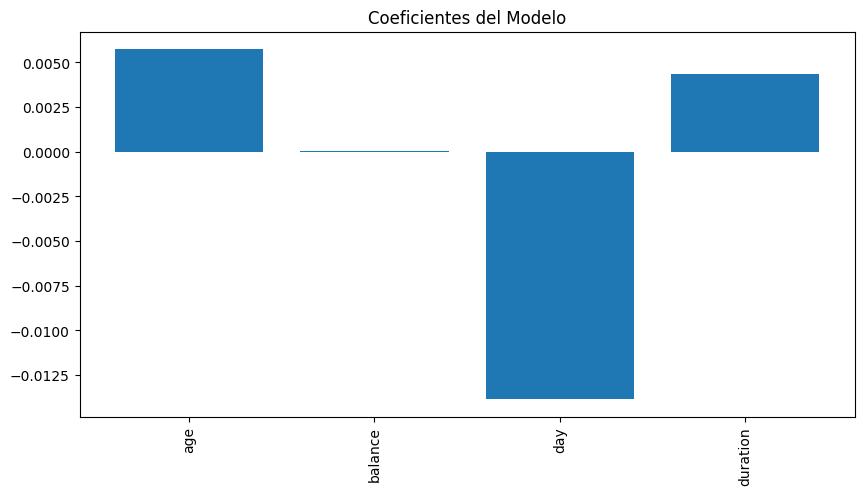

In [32]:
from sklearn.linear_model import LogisticRegression

# Asegúrate de que X contiene solo las columnas necesarias
# Por ejemplo, selecciona las primeras 4 columnas si eso es lo que se usó para entrenar el modelo
X_reduced = X.iloc[:, :4]

# Reentrenar el modelo
log_model = LogisticRegression()
log_model.fit(X_reduced, y)

# Plotear los coeficientes del modelo reentrenado
plt.figure(figsize=(10, 5))
plt.bar(X_reduced.columns, log_model.coef_[0])
plt.title("Coeficientes del Modelo")
plt.xticks(rotation=90)
plt.show()

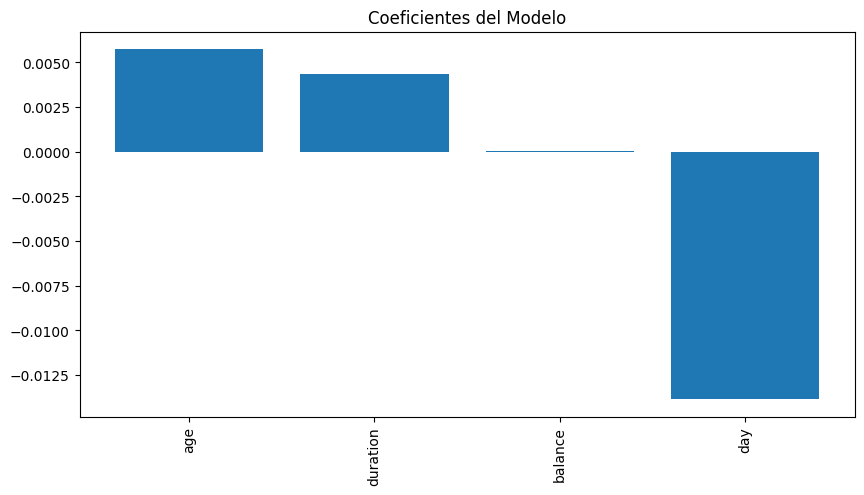

In [33]:
# lo mismo que antes pero en orden de importancia
coeficientes = log_model.coef_[0]
coeficientes_ordenados = sorted(coeficientes, reverse=True)
columnas_ordenadas = [x for _, x in sorted(zip(coeficientes, X_reduced.columns), reverse=True)]

plt.figure(figsize=(10, 5))
plt.bar(columnas_ordenadas, coeficientes_ordenados)
plt.title("Coeficientes del Modelo")
plt.xticks(rotation=90)
plt.show()

## con escalado

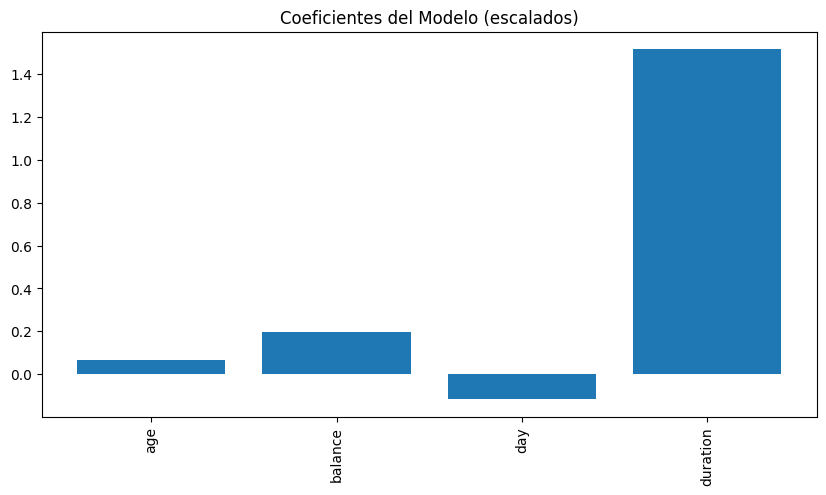

In [34]:
# coeficientes y plotearlos con escalado
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)

# Reentrenar 
log_model.fit(X_reduced_scaled, y)

plt.figure(figsize=(10, 5))
plt.bar(X_reduced.columns, log_model.coef_[0])
plt.title("Coeficientes del Modelo (escalados)")
plt.xticks(rotation=90)
plt.show()

In [35]:
data_actualizado.head(3)

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,1
1,56,45,5,1467,admin.,married,secondary,unknown,1
2,41,1270,5,1389,technician,married,secondary,unknown,1
